In [95]:
# дз по первой лекции, Хрыльченко Кирилл
# импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Пусть имеется выборка $X_1, \dots, X_n$, соответствующая некоторой случайной величине с распределением Бернулли и параметром $0 < p < 1$:

$$X = \begin{cases}
        1, & \text{с вероятностью p}\\
        0, & иначе
     \end{cases}$$
     
Хорошей точечной оценкой параметра $p$ является среднее выборочное: $$\overline{X} = \frac{\sum_{i=1}^{n}X_i}{n},$$которое можно получить как оценку максимального правдоподобия.

Хотелось бы также знать, с какой точностью и в каких границах мы можем оценить параметр $p$ по имеющейся выборке, с чем нам поможет центральная теорема и правило трех сигм:



* По ЦПТ среднее выборочное распределения при росте n будет стремиться по распределению к нормальному распределению 
$\mathcal{N}(\mathsf{E}X, \frac{\mathcal{D}X}{n})$
* Правило трех сигм гласит, что нормальная случайная величина $\mathcal{N}(\mu, \sigma^2)$ лежит в интервале $[\mu - 3\sigma, \mu + 3\sigma]$ с вероятностью не менее 0.9973
* Аналогично, для двух сигм справедлива величина вероятности не менее 0.954 и для одной сигмы - 0.683

В нашем случае $\mathcal{D}X = p\ (1 - p)$ и $ \mathsf{E}X = p$, поэтому при больших $n$ получаем:
$$\overline{X} \sim \mathcal{N}(p, \frac{p\ (1 - p)}{n})$$

Все вышеприведенные факты позволяют пользоваться следующей формулой:
$$\mathsf{P}( p - 3 \sqrt{\frac{p\ (1 - p)}{n}} \leq \overline{X} \leq p + 3 \sqrt{\frac{p\ (1 - p)}{n}}) \approx 0.9973 \ \ (*)$$ (и аналогичными формулами для случая 1-й и 2-х сигм)

In [27]:
# Данная функция по заданной вероятности, количеству объектов в выборке, и количеству сигм
# возвращает левую и правую границы доверительного интервала

def get_boundaries(p, n, n_std = 3):
    std = np.sqrt(p * (1 - p) / n)
    return p - n_std * std, p + n_std * std

Исследуем зависимость ширины доверительного интервала от истинного значения параметра при фиксированном размере выборки:

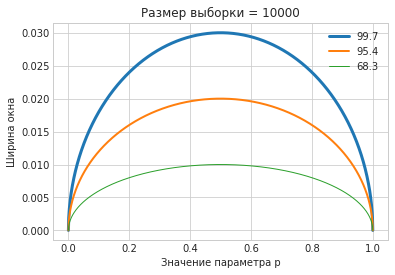

In [88]:
n = 10000
probs = np.linspace(0, 1, 1000)

for n_std in [3, 2, 1]:
    widths = []
    for p in probs:
        lb, rb = get_boundaries(p, n, n_std)
        widths.append(rb - lb)
    plt.plot(probs, widths, lw = n_std)

plt.title('Размер выборки = 10000')
plt.xlabel('Значение параметра p')
plt.ylabel('Ширина окна')
plt.legend(['99.7', '95.4', '68.3'])
plt.show()

Видно, что наименьшая достигается при <<скошенности>> параметра в сторону единицы или нуля, и чем ближе вероятности единицы и нуля, тем хуже точность предсказаний. Теперь проверим зависимость ширины окна от размера выборки при разных фиксированных значениях $p$:

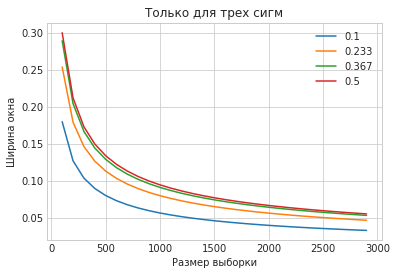

In [75]:
sample_sizes = np.arange(100, 3000, 100)
probs = np.linspace(0.1, 0.5, 4)

for p in probs:
    widths = []
    for n in sample_sizes:
        lb, rb = get_boundaries(p, n, n_std = 3)
        widths.append(rb - lb)
    plt.plot(sample_sizes, widths)
plt.title('Только для трех сигм')
plt.xlabel('Размер выборки')
plt.ylabel('Ширина окна')
plt.legend([round(p, 3) for p in probs])
plt.show()

Здесь все проще: во всех случаях с размером выборки ширина окна уменьшается, что является интуитивно понятным явлением.

Ответим на вопрос из лекции:

Достаточно ли выборки размера 10000, чтобы оценить значение параметра в окне ширины 0.02 с точностью 0.99, при том, что истинное значение параметра равно 0.18?

In [78]:
lb, rb = get_boundaries(0.18, 10000, n_std = 3)
print(rb - lb)

0.023051247254758267


Как видим, получившееся значение достаточно близко к 0.02. При этом, существуют методы типа Уилсона для бернуллиевских случайных величин, которые чуть лучше работают, когда истинное значение параметра сильно отклоняется от 0.5. Для таких методов ширина окна будет еще ближе к 0.02.

Из уравнения $(*)$ можно получить зависимость размера выборки от желаемой ширины окна при заданной точности:
$$ n = \frac{4\ n_\sigma\ p\ (1 - p)}{\text{width}^2}\ \ (**), $$ где $n_\sigma$ - величина, равная 3-м для правила трех сигм, равная 2-м для правила двух сигм, и т.п., а width - желаемая ширина окна.

Проиллюстрируем данную зависимость:

In [80]:
# Функция, реализующая формулу (**)
def get_samplesize(p, width, n_std = 3):
    return 4 * n_std**2 * p * (1 - p) / width**2

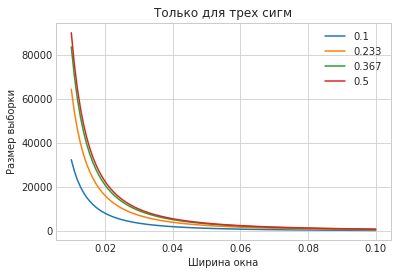

In [90]:
probs = np.linspace(0.1, 0.5, 4)
widths = np.linspace(0.01, 0.1, 100)
for p in probs:
    plt.plot(widths, [get_samplesize(p, width, n_std = 3) for width in widths])
    
plt.title('Только для трех сигм')
plt.xlabel('Ширина окна')
plt.ylabel('Размер выборки')
plt.legend([round(p, 3) for p in probs])
plt.show()

Полученная зависимость полностью согласуется с графиком, показывающим обратную зависимость, который был изображен ранее.

Очевидно, что необходимый размер выборки возрастает по мере приближения значения истинного параметра к 0.5. Иллюстрацию данной зависимости оставляем читателю.

Теперь можно ответить на вопрос из лекции: "сколько нужно опросить перед выборами людей, чтобы получить достоверную оценку общественного мнения"? что здесь такое "достоверная"?

* Во-первых, будем считать общественное мнение "бинарным", так как более сложные "дискретные" случаи тривиальным образом сводятся к бинарным: допустим, каждый человек поддерживает одну из 5 партий. Тогда для оценки вероятностей принадлежности к каждой из пяти партий достаточно рассмотреть пять (на самом деле, четыре) задачи - принадлежность/не принадлежность к первой партии, принадлежность / не принадлежность ко второй партии, и т.д. Будем считать точностью решения общей задачи среднюю точность решения каждой из задач.

* Во-вторых, достоверность оценки характеризуется двумя параметрами - точностью решения (вероятностью принадлежности к доверительному интервалу) и шириной окна.

Итак, применим ранее написанную функцию get_samplesize для точности 0.9973, ширины окна 0.01 и "наихудшего" значения вероятности, равного 0.5:

In [94]:
get_samplesize(0.5, 0.01)

90000.0

Итого, в худшем случае (при значении параметра 0.5, т.е. при нейтральном общественном мнении), необходимо 90 тыс. опрошенных.